In [26]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [13]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [30]:
X_train

array([[  0,   0,   0, ...,  15,  17,  12],
       [  0,   0,   0, ..., 505,  17,  12],
       [ 19, 758,  15, ...,  11,  17,  12],
       ...,
       [  0,   0,   0, ..., 407,  17,  12],
       [ 88,   2,  72, ..., 364,  17,  12],
       [125,   2,  21, ..., 113,  17,  12]], dtype=int32)

In [17]:
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len) # 훈련용 뉴스 기사 패딩
X_test = pad_sequences(X_test, maxlen=max_len) # 테스트용 뉴스 기사 패딩

In [28]:
X_train

array([[  0,   0,   0, ...,  15,  17,  12],
       [  0,   0,   0, ..., 505,  17,  12],
       [ 19, 758,  15, ...,  11,  17,  12],
       ...,
       [  0,   0,   0, ..., 407,  17,  12],
       [ 88,   2,  72, ..., 364,  17,  12],
       [125,   2,  21, ..., 113,  17,  12]], dtype=int32)

In [21]:
y_train = to_categorical(y_train) # 훈련용 뉴스 기사 레이블의 원-핫 인코딩
y_test = to_categorical(y_test) # 테스트용 뉴스 기사 레이블의 원-핫 인코딩

In [31]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 12s 1ms/sample - loss: 2.5344 - accuracy: 0.3673 - val_loss: 2.1200 - val_accuracy: 0.4947
Epoch 2/20
8982/8982 [==============================] - 10s 1ms/sample - loss: 2.0499 - accuracy: 0.4918 - val_loss: 1.9746 - val_accuracy: 0.5093
Epoch 3/20
8982/8982 [==============================] - 10s 1ms/sample - loss: 1.8421 - accuracy: 0.5366 - val_loss: 1.7423 - val_accuracy: 0.5588
Epoch 4/20
8982/8982 [==============================] - 11s 1ms/sample - loss: 1.6845 - accuracy: 0.5689 - val_loss: 1.7327 - val_accuracy: 0.5574
Epoch 5/20
8982/8982 [==============================] - 11s 1ms/sample - loss: 1.6011 - accuracy: 0.5963 - val_loss: 1.6086 - val_accuracy: 0.5966
Epoch 6/20
8982/8982 [==============================] - 11s 1ms/sample - loss: 1.4794 - accuracy: 0.6217 - val_loss: 1.6134 - val_accuracy: 0.6046
Epoch 7/20
8982/8982 [==============================] - 11s 1ms/sample

In [23]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

2246/2246 [==============================] - 1s 396us/sample - loss: 1.1891 - accuracy: 0.7088

 테스트 정확도: 0.7088


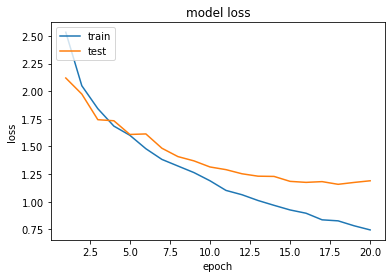

In [27]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()